In [1]:
# Data processing
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


dataset = pd.read_csv("Mall_Customers.csv")

In [2]:
# Let us cluster them based on Annual income and Spending Score

X = dataset.iloc[:, [3, 4]].values


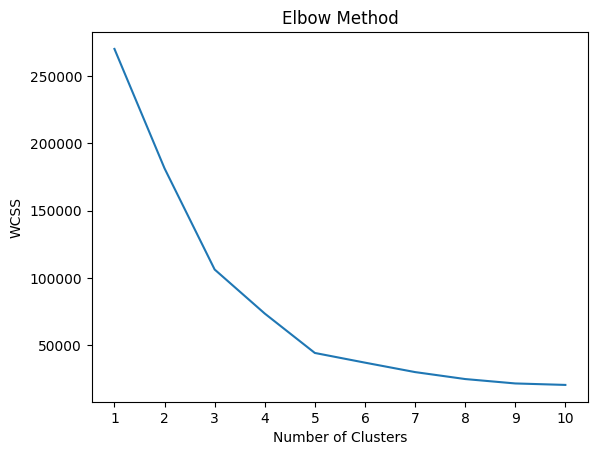

In [5]:
# Let us find the perfect number of clusters

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11): # let us check with from 1 to 11 clusters
    kmeans = KMeans(n_clusters=i, n_init=10, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# time to plot our number vs wcss graph and use elbow method to decide the best number of clusters

plt.plot(range(1,11), wcss)  # our x is number of cluster and y is wcss
plt.xticks(range(1,11))
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [6]:
# Then we choose 5, the elbow starts at 5
# let us build our cluster

cluster = KMeans(n_clusters=5, n_init=10, init="k-means++", max_iter=300, random_state=0)
cluster.fit(X)
y_clustered = cluster.predict(X)

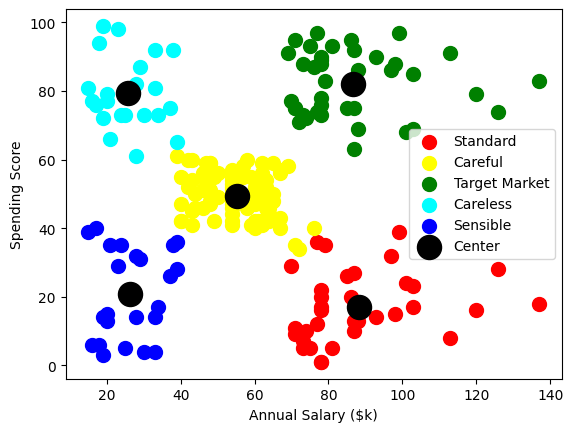

In [11]:
# Let us plot our cluster
# let us make X- annual salary, Y- spending score

# the cluster (I renamed the labels after seeing the graph)
plt.scatter(X[y_clustered==0, 0], X[y_clustered==0, 1], label="Standard", c="red", s=100)
plt.scatter(X[y_clustered==1, 0], X[y_clustered==1, 1], label="Careful", c="yellow", s=100)
plt.scatter(X[y_clustered==2, 0], X[y_clustered==2, 1], label="Target Market", c="green", s=100)
plt.scatter(X[y_clustered==3, 0], X[y_clustered==3, 1], label="Careless", c="cyan", s=100)
plt.scatter(X[y_clustered==4, 0], X[y_clustered==4, 1], label="Sensible", c="blue", s=100)

# the center
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], s=300, color="black", label="Center")
plt.xlabel("Annual Salary ($k)")
plt.ylabel("Spending Score")
plt.legend()
plt.show()